In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
df_radar = pd.read_csv("DATA/data.csv",
                      parse_dates=['date'],
                      index_col=["date"])

In [13]:
df_radar.sort_index().index.to_series().describe()

count                   65581
unique                  65581
top       2016-03-22 14:15:00
freq                        1
first     2016-01-01 00:05:00
last      2018-06-13 23:55:00
Name: date, dtype: object

In [14]:
df_radar.head()

,MB_SEG2,MB_LAG3,MB_SEG3A,MB_LAG2,MB_LAJ8,MB_LAJ1,MB_ANHA8,MB_LAG5,MB_PRO3,MB_IMB6,...,MB_LAJ4,MB_SEG6A,MB_SEG3,MB_BAND4,MB_IMB3,MB_SEG6B,MB_BAND3,MB_LAJ5,MB_SEG5A,MB_BAND1A
date,,,,,,,,,,,,,,,,,,,,,
2017-05-20 00:05:00,0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...,0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...,0. 0. 0. 0. 0....,0. 0. 0. 0. 0....,0. 0. 0.016117 0. 0....,0. 0. 0. 0. 0....,0. 0. 0. 0. 0....,0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...,0. 0. 0. 0. 0....,0. 0. 0. 0. 0....,...,0. 0. 0. 0. 0....,0. 0. 0. 0. 0. ...,0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...,0. 0. 0. 0.01217173 0....,0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...,0. 0. 0. 0. 0....,0. 0.01118852 0.0115071 0.01753331 0....,0. 0. 0. 0. 0....,0. 0. 0. 0. 0....,0. 0. 0. 0. 0.0115...
2017-05-20 00:15:00,0. 0. 0. 0. 0....,0. 0. 0.01062391 0. 0....,0. 0. 0. 0. 0....,0. 0. 0. 0. 0....,0.01574465 0.0288388 0.03254962 0. 0....,0. 0.01128675 0. 0. 0....,0. 0. 0. 0. 0....,0.01235934 0.01235934 0. 0. 0....,0. 0. 0.04972065 0.01482002 0....,0. 0. 0. 0. 0....,...,0. 0. 0. 0. 0....,0.01437826 0.02130861 0. 0.02972483 0....,0. 0. 0. 0. 0....,0. 0.01887932 0.01353387 0.0233336 0....,0. 0. 0. 0. 0....,0. 0. 0.01574465 0. 0....,0. 0.01353387 0. 0.02405049 0....,0.01831657 0. 0. 0. 0....,0. 0.01574465 0. 0. 0....,0.01313046 0.01887932 0.01482002 0.02067345 0....
2017-05-20 00:25:00,0.02376783 0. 0. 0. 0....,0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...,0. 0. 0. 0. 0....,0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...,0. 0.01541682 0.01346624 0. 0....,0. 0. 0. 0. 0....,0. 0. 0. 0. 0....,0. 0. 0. 0. 0....,0. 0. 0.01383554 0.01717883 0....,0. 0. 0. 0. 0....,...,0.01583961 0. 0.02795681 0. 0....,0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...,0. 0. 0. 0.01541682 0....,0. 0. 0. 0. 0....,0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...,0. 0. 0. 0. 0....,0. 0.01541682 0. 0. 0....,0. 0. 0.01500532 0.01672029 0....,0. 0. 0. 0. 0....,0. 0. 0. 0.010556 0....
2017-05-20 00:35:00,0.02365537 0. 0. 0. 0....,0. 0. 0. 0. 0....,0.01093157 0.01515367 0. 0. 0....,0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...,0.02826798 0.04682685 0.02436823 0.02100648 0....,0. 0. 0. 0.01126099 0....,0. 0. 0. 0. 0....,0. 0. 0. 0. 0....,0. 0.01126099 0.02826798 0.02296338 0....,0. 0. 0. 0. 0....,...,0. 0. 0.01093157 0.02585903 0....,0. 0. 0. 0. 0....,0.01093157 0. 0.01194991 0.01656534 0....,0.01471037 0. 0. 0.02510256 0....,0. 0. 0. 0. 0....,0. 0. 0. 0. 0....,0.01608074 0.03479794 0. 0.02510256 0....,0.01231003 0.01345679 0.02365537 0. 0....,0. 0.01 0. 0. 0....,0. 0. 0.01030135 0.03377998 0....
2017-05-20 00:45:00,0. 0. 0. 0. 0....,0. 0. 0. 0. 0....,0.01868406 0. 0.01387392 0. 0....,0. 0. 0. 0. 0....,0. 0.01268871 0.02442397 0.03099087 0....,0. 0. 0. 0. 0....,0. 0. 0. 0.01346704 0....,0. 0. 0. 0. 0....,0. 0. 0.03388562 0.0251619 0....,0. 0.01126442 0.0106134 0. 0....,...,0.02301239 0.02670532 0. 0.04173552 0....,0.0106134 0. 0. 0. 0....,0. 0. 0. 0. 0....,0.01813611 0.01387392 0. 0.01268871 0....,0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...,0.01030214 0. 0. 0. 0....,0.03289184 0.0251619 0. 0.03192721 0....,0.01658679 0.01387392 0.01562817 0.01 0....,0. 0.01472494 0.01562817 0.01346704 0....,0.0216824 0. 0. 0.01708794 0....


In [15]:
def fromstring(x):
    try:
        return np.fromstring(x, sep=" ")
    except:
        return np.nan
    

In [16]:
df = df_radar.applymap(fromstring)

In [17]:
df.MB_SEG2.head(1).values

array([array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])], dtype=object)

In [18]:
def extractor(df,mirror):
    mirror = np.reshape(mirror,(25,))
    mirror = mirror.astype(bool)
    def mean_axis(x):
        try:
            return x[mirror].mean()
        except:
            return np.nan
    new_df = df.applymap(mean_axis)
    return new_df



In [19]:
mirror = np.array([[0,0,0,0,0],
            [0,0,0,0,0],
            [0,0,1,0,0],
            [0,0,0,0,0],
            [0,0,0,0,0]])


df_1x1 = extractor(df,mirror)
df_1x1.to_csv("DATA/radar.csv")
df_1x1.head(1)

,MB_SEG2,MB_LAG3,MB_SEG3A,MB_LAG2,MB_LAJ8,MB_LAJ1,MB_ANHA8,MB_LAG5,MB_PRO3,MB_IMB6,...,MB_LAJ4,MB_SEG6A,MB_SEG3,MB_BAND4,MB_IMB3,MB_SEG6B,MB_BAND3,MB_LAJ5,MB_SEG5A,MB_BAND1A
date,,,,,,,,,,,,,,,,,,,,,
2017-05-20 00:05:00,0.0,0.0,0.0,0.0,0.0,0.011835,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.036382,0.0,0.0,0.010285,0.0,0.0,0.0


In [21]:
mirror = np.array([[0,0,0,0,0],
            [0,0,1,0,0],
            [0,1,1,1,0],
            [0,0,1,0,0],
            [0,0,0,0,0]])


df_cruz = extractor(df,mirror)
df_cruz.head(1)

,MB_SEG2,MB_LAG3,MB_SEG3A,MB_LAG2,MB_LAJ8,MB_LAJ1,MB_ANHA8,MB_LAG5,MB_PRO3,MB_IMB6,...,MB_LAJ4,MB_SEG6A,MB_SEG3,MB_BAND4,MB_IMB3,MB_SEG6B,MB_BAND3,MB_LAJ5,MB_SEG5A,MB_BAND1A
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 00:05:00,0.002613,0.0,0.005212,0.006091,0.005993,0.002186,0.00239,0.008242,0.007884,0.017325,...,0.002613,0.002236,0.0,0.01119,0.00349,0.027428,0.005755,0.002732,0.004325,0.00239


In [22]:
mirror = np.array([[0,0,0,0,0],
            [0,1,1,1,0],
            [0,1,1,1,0],
            [0,1,1,1,0],
            [0,0,0,0,0]])


df_3x3 = extractor(df,mirror)
df_3x3.head(1)

,MB_SEG2,MB_LAG3,MB_SEG3A,MB_LAG2,MB_LAJ8,MB_LAJ1,MB_ANHA8,MB_LAG5,MB_PRO3,MB_IMB6,...,MB_LAJ4,MB_SEG6A,MB_SEG3,MB_BAND4,MB_IMB3,MB_SEG6B,MB_BAND3,MB_LAJ5,MB_SEG5A,MB_BAND1A
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 00:05:00,0.004336,0.004461,0.006177,0.005917,0.007097,0.003382,0.002716,0.004579,0.010859,0.012697,...,0.0041,0.004248,0.005564,0.008925,0.003526,0.026153,0.004682,0.001518,0.00359,0.004805


In [23]:
def compare(station,period,df1,df2, df_return= False):
    
    lr = linear_model.LinearRegression()
    
    df1_freg = df1.groupby(pd.Grouper(freq=period)).sum()
    df2_freg = df2.groupby(pd.Grouper(freq=period)).sum()
    
    df1_station = df1_freg[station]
    df2_station = df2_freg[station]
    
    df1_station = df1_station.rename(station + "_ESTACAO")
    df2_station = df2_station.rename(station + "_RADAR")
    
    
    df = pd.concat([df1_station,df2_station],axis=1)
    
    df.dropna(inplace=True)

    X = df.values[:,-1:]
    y = df.values[:,:-1]
    y = y.reshape(-1,)

    lr.fit(X,y)
   
    y_pred = lr.predict(X)
    
    # The coefficients
    print('Coefficients: \n', lr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(y, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('R2 score: %.2f' % r2_score(y, y_pred))
    
    plt.figure(1, figsize=(15,5))
    plt.suptitle("Valores acumulados por {} na Estação {}".format(period,station), fontsize=16)
    
    plt.subplot(121)
    plt.plot(df[station + "_ESTACAO"],alpha=1, color='b',label="ESTAÇÃO")
    plt.plot(df[station + "_RADAR"],alpha=0.6, color='orange',label="RADAR")
    #plt.yscale("log")
    plt.ylabel("Valores Radar")
    plt.legend()
    

    plt.subplot(122)
    plt.ylim(bottom=-1, top=60)
    plt.scatter(df[station + "_RADAR"],df[station + "_ESTACAO"])
    plt.plot(X,y_pred,color='black', linewidth=1)
    plt.xlabel("RADAR")
    plt.ylabel("ESTAÇÃO")
    

    plt.show()
    if df_return:
        return df
    
    

# MB_PRO1 Comparação entre Pixel, Cruz e 3x3;

Podemos ver que a a diferença entre usar a média dos valores em torno é insignificante

Coefficients: 
 [1.01654932]
Mean squared error: 39.41
R2 score: 0.72


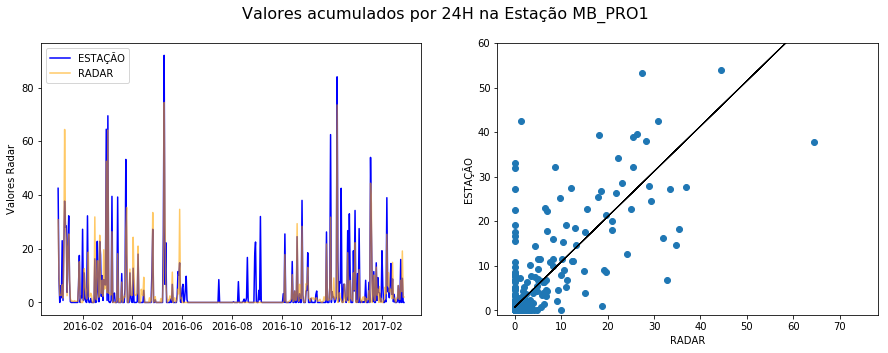

Coefficients: 
 [1.11699161]
Mean squared error: 37.68
R2 score: 0.73


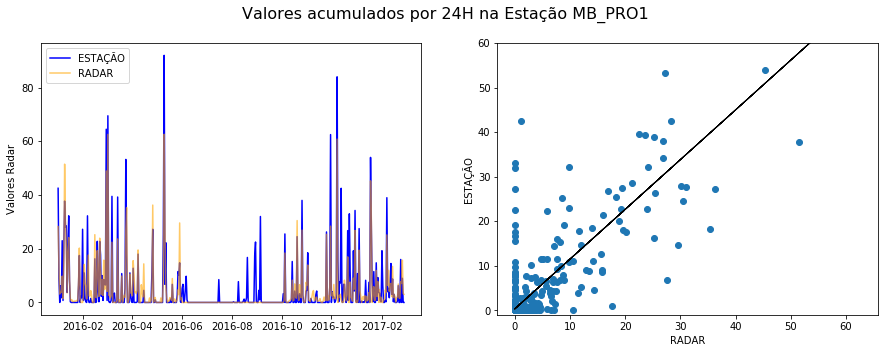

Coefficients: 
 [1.1140824]
Mean squared error: 36.58
R2 score: 0.74


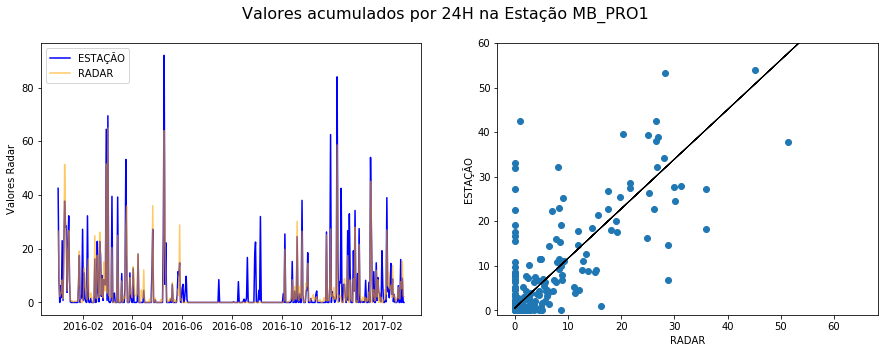

In [52]:
compare("MB_PRO1","24H",df_estacao,df_1x1)
compare("MB_PRO1","24H",df_estacao,df_cruz)
compare("MB_PRO1","24H",df_estacao,df_3x3)
